In [1]:
# modules import
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [2]:
# Open data
# file paths
netCDF_NEMO_fileCW = '/Users/jcaillet/Documents/nemo/AMUXL025/ANALYSES/NETCDF/fonte_iceshelf/NETCDF_MELT_PTCD_REV_CW.nc'
general_path = '/Users/jcaillet/Documents/nemo/AMUXL025/ANALYSES/NETCDF/fonte_iceshelf'

# open files
SBCCW = xr.open_mfdataset(netCDF_NEMO_fileCW)

# saved file path
saved_file1 = '/Users/jcaillet/Documents/nemo/AMUXL025/ANALYSES/RESULTS/monthly_melt_ART_REV_CW.pdf'

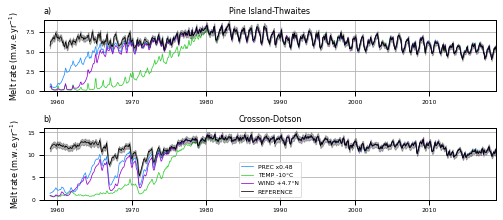

In [3]:
sns.set_context('paper')

# surface of iceshelves
SThwaites = 4650261338.879133
SPineIsland = 6362318976.695184
SCrosson = 4898138142.642234
SDotson = 5024151800.130805

## figure
f = plt.figure(figsize = (7.08, 3.15))
ax={}
nb_rows = 2
nb_cols = 1
# add label and colorbar
b_CW = ['PREC x0.48', 'TEMP -10°C', 'WIND +4.7°N','REFERENCE']
color_CW = ['dodgerblue', 'limegreen', 'darkviolet', 'black']
# add xaxis limits
x = [datetime.date(1958, 3, 1), datetime.date(2019, 1, 1)] 

k = 0
# plot for various perturbations
netCDF_NEMO_file = f"{general_path}/NETCDF_MELT_PTCD_REV_CW.nc"
SBC = xr.open_mfdataset(netCDF_NEMO_file)
SBC['year']=SBC.time.dt.year
for l in np.arange(0, SBC['iceshelf'].size, 1):
    k=k+1
    ax[k] = f.add_subplot(nb_rows,nb_cols, k)
    SBCselect = SBC.melt[l, :, :]
    for j in np.arange(0, SBC['num'].size, 1):
        SBC0 = SBCselect[:, j]
        if k==1:
            if color_CW[j]=='black':
                ax[k].plot(SBC0.time, SBC0 * 10**12 / 1000 / (SThwaites + SPineIsland), linewidth = 0.75, color= color_CW[j], label = b_CW[j])
                ax[k].fill_between(SBC0.time, SBC0 * 10**12 / 1000 / (SThwaites + SPineIsland) * 0.95, SBC0 * 10**12 / 1000 / (SThwaites + SPineIsland) * 1.05, color= 'black', alpha=0.3, zorder=5)
            else:
                ax[k].plot(SBC0.time, SBC0 * 10**12 / 1000 / (SThwaites + SPineIsland), linewidth = 0.75, color= color_CW[j], label = b_CW[j])
            ax[k].set_title('Pine Island-Thwaites', fontsize=8)
            ax[k].set_title('a)', fontsize=8, loc='left')
            ax[k].set_ylim(0,9)
        if k==2:
            if color_CW[j]=='black':
                ax[k].plot(SBC0.time, SBC0 * 10**12 / 1000 / (SCrosson + SDotson), linewidth = 0.75, color= color_CW[j], label = b_CW[j])
                ax[k].fill_between(SBC0.time, SBC0 * 10**12 / 1000 / (SCrosson + SDotson) * 0.95, SBC0 * 10**12 / 1000 / (SCrosson + SDotson) * 1.05, color= 'black', alpha=0.3, zorder=5)
            else:
                ax[k].plot(SBC0.time, SBC0 * 10**12 / 1000 / (SCrosson + SDotson), linewidth = 0.75, color= color_CW[j], label = b_CW[j])
            ax[k].set_title('Crosson-Dotson', fontsize=8)
            ax[k].set_title('b)', fontsize=8, loc='left')
            ax[k].set_ylim(0,16) 
            ax[k].legend(loc='lower center', prop={"size":6})
        ax[k].set_ylabel('Melt rate (m.w.e.yr$^{-1}$)', fontsize=8)
        ax[k].set_xlim(x[0], x[1])
        plt.xticks(fontsize=6)
        plt.yticks(fontsize=6)
        plt.grid(True)
        plt.tight_layout()
# saved file
plt.savefig(saved_file1)